In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, SelectPercentile, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA


In [2]:

X = pd.read_csv("../dataset/extracted_features.csv").values
index_for_removal = np.array(
    [
        0, 10, 14, 17, 25, 26, 35, 39, 49, 59, 62,
    ]
)
X_indexed = np.delete(X, index_for_removal, 1)

y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(
    X_indexed, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
y_train = y_train.ravel()

select = SelectPercentile(percentile=90)
select.fit(X_train, y_train)
X_train = select.transform(X_train)
X_test = select.transform(X_test)

rf = RandomForestClassifier(
    n_estimators=200,
    max_features=3,
).fit(X_train, y_train)

select_sfm = SelectFromModel(
    rf,
    threshold='0.1*mean',
)
select_sfm.fit(X_train, y_train)
X_train = select_sfm.transform(X_train)
X_test = select_sfm.transform(X_test)


select_rfe = RFE(RandomForestClassifier(
    n_estimators=200, random_state=42
), n_features_to_select=40)

select_rfe.fit(X_train, y_train)
X_train = select_rfe.transform(X_train)
X_test = select_rfe.transform(X_test)


scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


pca = PCA(n_components=37, random_state=42)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)

In [4]:
def knn_and_graph(neighbor_max, X_train_data, y_train_data, X_test_data, y_test_data):
    plt.style.use('_mpl-gallery')
    x = np.linspace(1, neighbor_max, neighbor_max)
    results = []
    for neighbor_count in x:
        clf = KNeighborsClassifier(n_neighbors=int(neighbor_count))
        clf.fit(X_train_data, y_train_data)
        results.append(
            [
                neighbor_count,
                clf.score(X_train_data, y_train_data),
                clf.score(X_test_data, y_test_data)
            ]
        )

    x = [neighbors[0] for neighbors in results]
    fig = plt.figure(figsize=[8,8])
    plt.title("KNN")
    plt.xlabel("Neighbors")
    plt.ylabel("Accuracy (0 - 1)")
    plt.plot(x, [train[1] for train in results], label='Training Score')
    plt.plot(x, [test[2] for test in results], label='Testing Score')
    plt.legend()
    # fig = plt.figure()
    plt.show()
    #

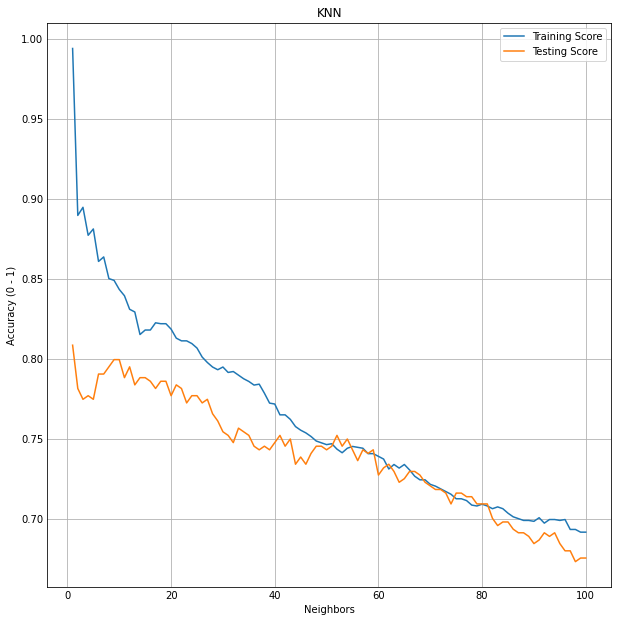

In [5]:

### KNN Train first view
knn_and_graph(100, X_train_pca, y_train, X_test_pca, y_test)

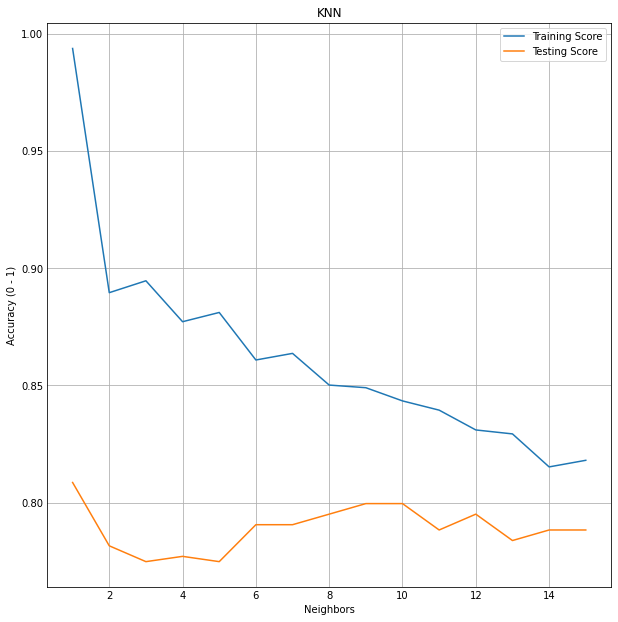

In [6]:
knn_and_graph(15, X_train_pca, y_train, X_test_pca, y_test)

Best K:  5
Train score:  0.9092957746478874
[0.01825561 0.02256336 0.02149722 0.02051509 0.0208831  0.0199185
 0.02004557 0.01893829 0.01987064 0.01458274 0.02112488 0.01888795
 0.01451729 0.01930348]


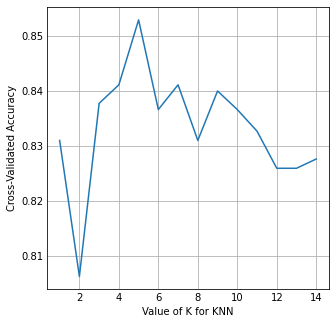

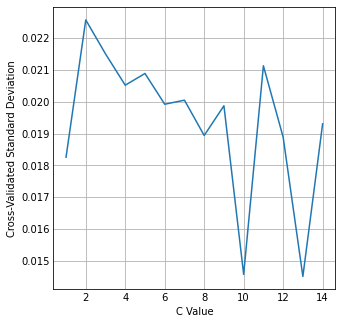

In [7]:
k_range = range(1, 15)
k_scores = []
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
hyperparameters = dict(n_neighbors=k_range)
clf = GridSearchCV(knn, hyperparameters, cv=5)
clf.fit(X_train_pca, y_train)
scores_knn = clf.cv_results_['mean_test_score']
std_scores = clf.cv_results_['std_test_score']
optimal_k_val = clf.best_params_['n_neighbors']
print("Best K: ", optimal_k_val)
print("Train score: ", KNeighborsClassifier(n_neighbors=optimal_k_val).fit(X_train_pca, y_train).score(X_train_pca, y_train))
print(std_scores)
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     k_scores.append(scores.mean())
# plot to see clearly
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.plot(k_range, scores_knn)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.plot(k_range, std_scores)
plt.xlabel('C Value')
plt.ylabel('Cross-Validated Standard Deviation')
plt.show()
# Logistic Regression

In [7]:
optimal_knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_pca, y_train)
print(optimal_knn.score(X_train_pca, y_train))
print(optimal_knn.score(X_test_pca, y_test))

0.8490140845070423
0.7995495495495496


scaled

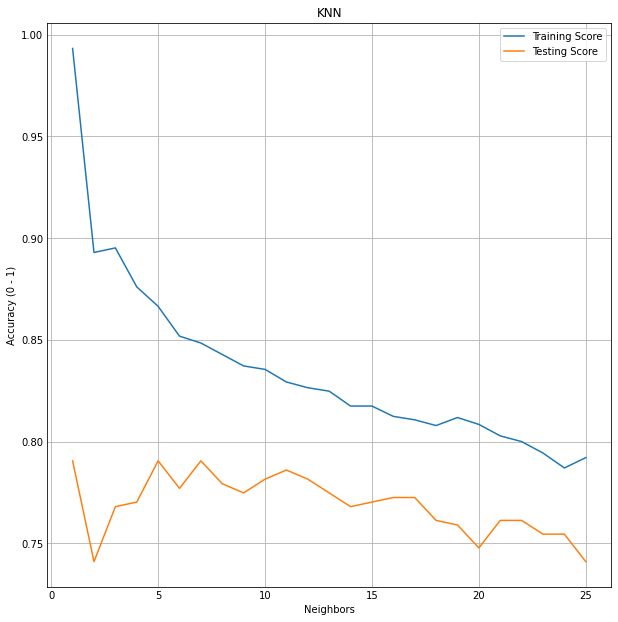

In [20]:
knn_and_graph(25, X_train_standard, y_train, X_test_standard, y_test)

In [37]:
knn_standard = KNeighborsClassifier(n_neighbors=5).fit(X_train_standard, y_train)
print(knn_standard.score(X_train_standard, y_train))
print(knn_standard.score(X_test_standard, y_test))


0.8664788732394366
0.7905405405405406


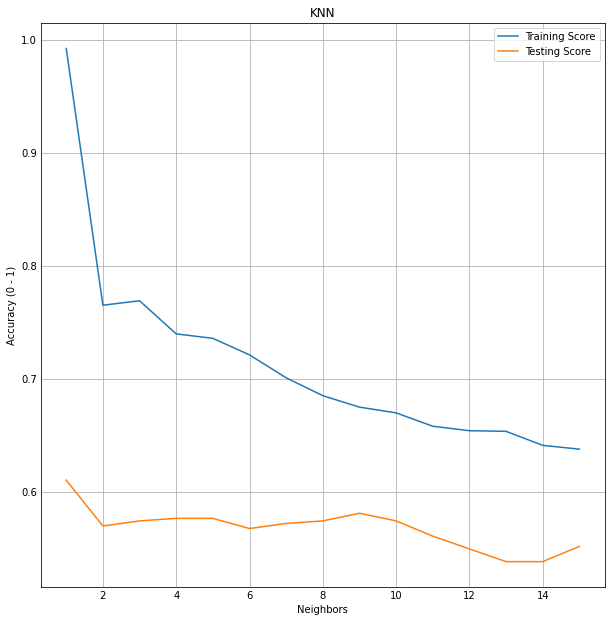

In [21]:
knn_and_graph(15, X_train_robust, y_train, X_test_robust, y_test)

In [38]:
knn_robust = KNeighborsClassifier(n_neighbors=5).fit(X_train_robust, y_train)
print(knn_robust.score(X_train_robust, y_train))
print(knn_robust.score(X_test_robust, y_test))


0.7357746478873239
0.5765765765765766


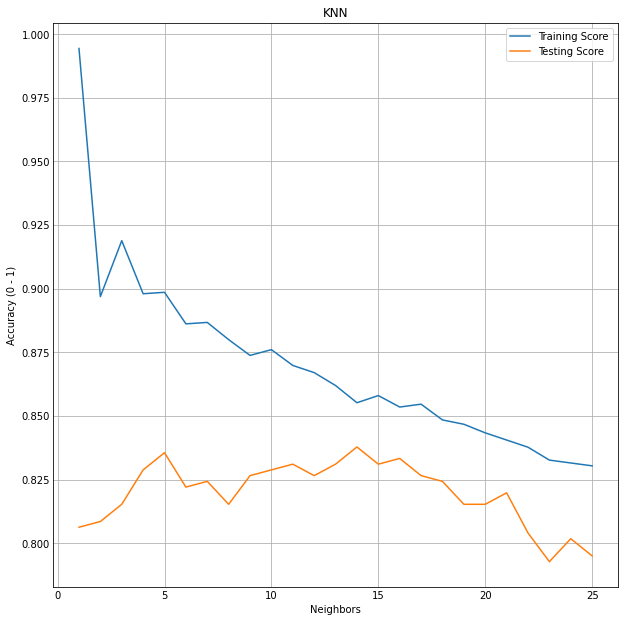

In [25]:
knn_and_graph(25, X_train_minmax, y_train, X_test_minmax, y_test)

In [26]:
knn_minmax = KNeighborsClassifier(n_neighbors=14).fit(X_train_minmax, y_train)
print(knn_minmax.score(X_train_minmax, y_train))
print(knn_minmax.score(X_test_minmax, y_test))

0.8552112676056338
0.8378378378378378


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=56, random_state=42)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)

knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)
print(knn_pca.score(X_train_pca, y_train))
print(knn_pca.score(X_test_pca, y_test))

0.8670422535211267
0.7905405405405406
